In [2]:
# Import data analysis libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Filenames with their paths.. change the path your file path!
PATH="./ml-25m/"
RATING_DATA_FILE=PATH+"/ratings.csv"
MOVIE_DATA_FILE=PATH+"movies.csv"

In [4]:
# Read the ratings details from the csv file.
mov_df = pd.read_csv(RATING_DATA_FILE)

In [5]:
# Check a few entries in this file
mov_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
# Load the dataset with movie details.
movie_titles = pd.read_csv(MOVIE_DATA_FILE)
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Merge the two dataframes to match movies with their ratings.
mov_df = pd.merge(mov_df, movie_titles, on='movieId')
mov_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [8]:
# Find the average and maximum values for rating.
mov_df.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [9]:
# Remove all NAN values
mov_df.dropna(inplace=True)
mov_df.shape

(25000095, 6)

In [10]:
# Get average rating for each movie
ratings = pd.DataFrame(mov_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.896648
#1 Cheerleader Camp (2010),2.111111
#Captured (2017),3.750000
#Female Pleasure (2018),3.666667


In [11]:
# Add to this number of users who rated this movie!
ratings['number_of_ratings'] = mov_df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


<Axes: >

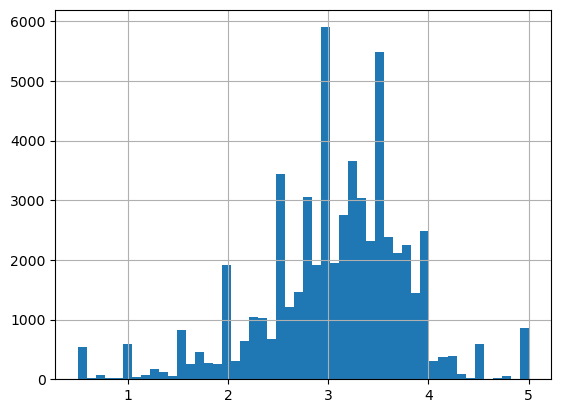

In [12]:
# Plotting the distribution of the movies
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

<Axes: >

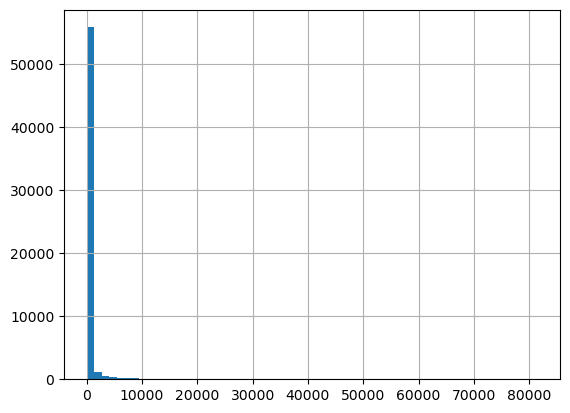

In [13]:
# Visualise number of ratings similarily
ratings['number_of_ratings'].hist(bins=60)

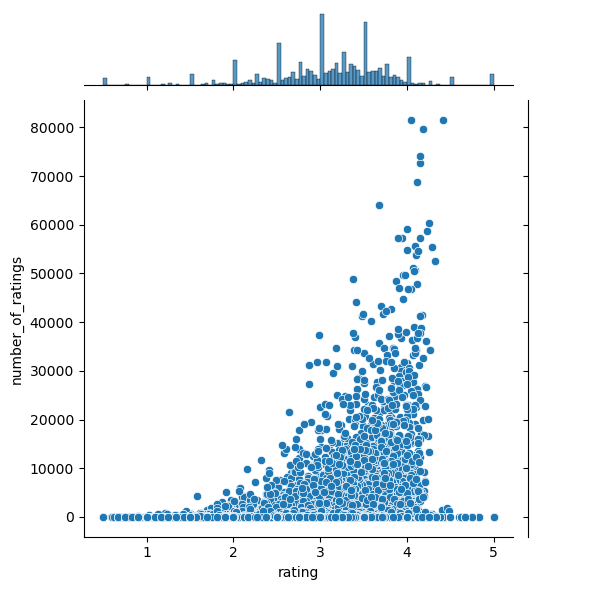

In [14]:
# Can we find the relationship between these two.
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [15]:
# Sort the movies to find the top rated movies...
ratings.sort_values(by=['number_of_ratings'],ascending=False,inplace=True)

In [16]:
ratings.head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674


In [17]:
# Lets work with top 500 movies!
top_rating = ratings[0:500]

In [18]:
# Check the values.
top_rating

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674
...,...,...
Blazing Saddles (1974),3.860866,11320
First Knight (1995),3.081882,11309
Executive Decision (1996),3.353111,11284


In [19]:
#Need to extract only these movies from the original data.
#So, check out what the earlier dataframe had.
mov_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [20]:
# In order to find the entries, reset the index to find the titles.
top_rating.reset_index(inplace=True)
top_rating.head()

,title,rating,number_of_ratings
0,Forrest Gump (1994),4.048011,81491
1,"Shawshank Redemption, The (1994)",4.413576,81482
2,Pulp Fiction (1994),4.188912,79672
3,"Silence of the Lambs, The (1991)",4.151342,74127
4,"Matrix, The (1999)",4.154099,72674


In [21]:
# Find details of only the toprated movies using the top rated titles.
topmovies_df = mov_df[mov_df["title"].isin(top_rating["title"])]

In [22]:
# Number of entries are alnmost halved. But it is still good enough for our study.
topmovies_df.shape

(10944751, 6)

In [23]:
# The original data size for comparison.
mov_df.shape

(25000095, 6)

In [26]:
# Create the matrix discussed above with user Id as index and titles as
# columns with the value representing the real ratings.
movie_matrix = topmovies_df.pivot_table(index='userId', columns='title', values='rating')

In [27]:
# Check out the new matrix.
movie_matrix.head()

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,3.0,4.0,3.0,NaN,3.5,NaN,...,NaN,NaN,NaN,4.5,4.0,4.0,4.0,NaN,NaN,4.0
4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,4.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Check out the movies with mazimum number of ratings.
top_rating.sort_values('number_of_ratings', ascending=False).head(10)

,title,rating,number_of_ratings
0,Forrest Gump (1994),4.048011,81491
1,"Shawshank Redemption, The (1994)",4.413576,81482
2,Pulp Fiction (1994),4.188912,79672
3,"Silence of the Lambs, The (1991)",4.151342,74127
4,"Matrix, The (1999)",4.154099,72674
5,Star Wars: Episode IV - A New Hope (1977),4.120189,68717
6,Jurassic Park (1993),3.679175,64144
7,Schindler's List (1993),4.247579,60411
8,Braveheart (1995),4.002273,59184
9,Fight Club (1999),4.228311,58773


In [29]:
# Check out the movies with maximum rating!
top_rating.sort_values('rating', ascending=False).head(10)

,title,rating,number_of_ratings
1,"Shawshank Redemption, The (1994)",4.413576,81482
18,"Godfather, The (1972)",4.324336,52498
14,"Usual Suspects, The (1995)",4.284353,55366
65,"Godfather: Part II, The (1974)",4.261759,34188
390,Seven Samurai (Shichinin no samurai) (1954),4.254769,13367
7,Schindler's List (1993),4.247579,60411
268,12 Angry Men (1957),4.243014,16569
197,Rear Window (1954),4.237948,20162
9,Fight Club (1999),4.228311,58773
55,One Flew Over the Cuckoo's Nest (1975),4.218662,36058


In [30]:
# Find the Forest Gump movie rating!
FG_user_rating = movie_matrix['Forrest Gump (1994)']

In [31]:
# Check out what values are in there.
FG_user_rating.head()

userId
1    NaN
2    4.5
3    4.0
4    NaN
5    4.0
Name: Forrest Gump (1994), dtype: float64

In [32]:
# Find the movies with correlation to this movie.
similar_to_fg = movie_matrix.corrwith(FG_user_rating)

In [33]:
# Sort this to find the closest correlations!
similar_to_fg.sort_values(ascending=False).head()

title
Forrest Gump (1994)           1.000000
Green Mile, The (1999)        0.432584
Rain Man (1988)               0.414662
Cast Away (2000)              0.405220
Saving Private Ryan (1998)    0.382258
dtype: float64

In [34]:
# Find the user rating for Schindler's List.
SL_user_rating = movie_matrix['Schindler\'s List (1993)']

In [35]:
# Check out the values.
SL_user_rating.head()

userId
1    NaN
2    5.0
3    4.0
4    NaN
5    NaN
Name: Schindler's List (1993), dtype: float64

In [36]:
# Find the movies with correlation to this movie.
similar_to_sl=movie_matrix.corrwith(SL_user_rating)

In [37]:
#These are the movies similar to this movie
similar_to_sl.sort_values(ascending=False).head()

title
Schindler's List (1993)       1.000000
Pianist, The (2002)           0.441139
Saving Private Ryan (1998)    0.440041
Hotel Rwanda (2004)           0.396331
Intouchables (2011)           0.388966
dtype: float64

In [38]:
# Save the correlations as a dataframe
corr_SL = pd.DataFrame(similar_to_sl, columns=['correlation'])
corr_SL.dropna(inplace=True)
corr_SL.head()

,correlation
title,
(500) Days of Summer (2009),0.213802
10 Things I Hate About You (1999),0.074497
12 Angry Men (1957),0.313231
2001: A Space Odyssey (1968),0.129859
28 Days Later (2002),0.174144


In [39]:
corr_SL.shape

(500, 1)

In [40]:
# Do the same for each movie.
corr_FG = pd.DataFrame(similar_to_fg, columns=['correlation'])
corr_FG.dropna(inplace=True)
corr_FG.head()

,correlation
title,
(500) Days of Summer (2009),0.239583
10 Things I Hate About You (1999),0.132006
12 Angry Men (1957),0.164738
2001: A Space Odyssey (1968),0.056041
28 Days Later (2002),0.127230


In [41]:
corr_FG.shape

(500, 1)

In [42]:
# Need to add the ratings with the index movie title.
# Set the index of our ratings table to movie titles.
top_rating.set_index(['title'],inplace=True)
top_rating.head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674


In [43]:
# Join this with the correlation table of first movie.
corr_SL = corr_SL.join(top_rating).sort_values(['correlation'],ascending=False)

In [44]:
corr_SL.head()

,correlation,rating,number_of_ratings
title,,,
Schindler's List (1993),1.000000,4.247579,60411
"Pianist, The (2002)",0.441139,4.047393,17070
Saving Private Ryan (1998),0.440041,4.044108,46783
Hotel Rwanda (2004),0.396331,3.978451,11462
Intouchables (2011),0.388966,4.124755,12745


In [45]:
# Join this with the correlation table of second movie.
corr_FG=corr_FG.join(top_rating).sort_values(['correlation'],ascending=False)

In [46]:
corr_FG.head()

,correlation,rating,number_of_ratings
title,,,
Forrest Gump (1994),1.000000,4.048011,81491
"Green Mile, The (1999)",0.432584,4.027754,30482
Rain Man (1988),0.414662,3.900244,27813
Cast Away (2000),0.405220,3.663023,25024
Saving Private Ryan (1998),0.382258,4.044108,46783
